# 20 More Event‑Processing Interview Problems (Stdlib‑Only, **No Solutions**)

*Each problem gives you a full task statement, a hint listing the stdlib constructs you’ll likely need, and a starter code cell.*

All problems presume events shaped like:

```python
{
    "id": int,
    "ts": "ISO‑8601 string",
    "user": "user42",
    "type": "LOGIN" | "VIEW" | "PURCHASE" | ...,
    "payload": {"value": int, ...}
}
```

Use the generator below or plug in your own dataset.


## Optional Helper – Synthetic Event Generator

In [5]:

import random
from datetime import datetime, timedelta

EVENT_TYPES = ["CLICK", "VIEW", "LOGIN", "PURCHASE", "LOGOUT"]
random.seed(1337)

fixed_now = datetime(2024, 6, 14, 12, 0, 0)
start, end = fixed_now - timedelta(days=7), fixed_now

def _rand_ts(start, end):
    delta = end - start
    return start + timedelta(seconds=random.randint(0, int(delta.total_seconds())))

def generate_events(n=1000):
    for i in range(n):
        yield {
            "id": i,
            "ts": _rand_ts(start, end).isoformat(),
            "user": f"user{random.randint(1, 200)}",
            "type": random.choice(EVENT_TYPES),
            "payload": {"value": random.randint(1, 10000)}
        }
        


---

### Problem 1 – Hourly Event Histogram

**Task**  
Count how many events fall into each **hour of the day** (0‑23) and return a dict like `{hour: count}`.

**Hint – stdlib tools to consider** → datetime, collections.Counter


In [83]:
# TODO – your code for Problem 1
evs = generate_events(100)

In [65]:
import pandas as pd

df = pd.DataFrame(columns=["id", "ts", "user", "type", "value"])
for ev in evs:
    flat_ev = {**ev, "value": ev['payload']['value']}
    df.loc[len(df)] = flat_ev

df["ts"] = pd.to_datetime(df["ts"])

In [66]:
df.head()

,id,ts,user,type,value
0,0,2025-06-13 14:13:43.413729,user71,PURCHASE,6861
1,1,2025-06-13 09:09:41.413729,user78,VIEW,2092
2,2,2025-06-13 14:51:02.413729,user78,LOGOUT,6993
3,3,2025-06-13 16:29:46.413729,user6,PURCHASE,5556
4,4,2025-06-13 12:26:26.413729,user184,PURCHASE,5665


In [71]:
# Correct syntax - pass grouping keys as a list
hourly_counts = df.groupby(df["ts"].dt.hour).size()

<Axes: xlabel='ts'>

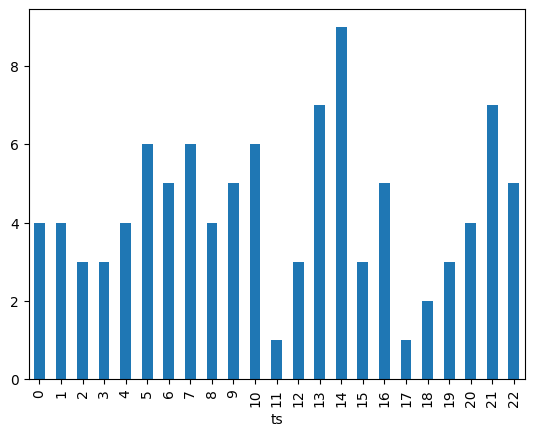

In [75]:
hourly_counts.plot(kind='bar')

In [84]:
from collections import Counter
hourly_counts = Counter(datetime.fromisoformat(ev["ts"]).hour for ev in evs)

In [85]:
hourly_counts

Counter({21: 9,
         2: 8,
         0: 7,
         23: 6,
         17: 6,
         22: 5,
         19: 5,
         9: 5,
         15: 4,
         14: 4,
         3: 4,
         6: 4,
         12: 4,
         4: 4,
         18: 4,
         1: 3,
         7: 3,
         11: 3,
         8: 3,
         5: 2,
         10: 2,
         20: 2,
         13: 2,
         16: 1})

---

### Problem 2 – Streaming 90th‑Percentile Payload Value

**Task**  
Keep a data structure that lets you query the 90th percentile of `payload['value']` at any moment during ingestion.

**Hint – stdlib tools to consider** → heapq, bisect, statistics.quantiles


In [108]:
# TODO – your code for Problem 2
import bisect
from statistics import quantiles

values = []
for ev in generate_events(100):
    bisect.insort(values, ev.get('payload').get('value'))
    if len(values) >= 2:
        q = quantiles(values, n=10, method="inclusive")
        q90 = q[-1] # 
        idx = bisect.bisect_left(values, q90)
        if idx >= len(values):
            actual_90th = values[-1]
        else:
            actual_90th = values[idx]
        print(f"Interpolated 90th: {q90}, Actual value at/above 90th: {actual_90th}")





Interpolated 90th: 6239.6, Actual value at/above 90th: 6852
Interpolated 90th: 6618.8, Actual value at/above 90th: 6852
Interpolated 90th: 8639.8, Actual value at/above 90th: 9406
Interpolated 90th: 8384.4, Actual value at/above 90th: 9406
Interpolated 90th: 8195.0, Actual value at/above 90th: 9406
Interpolated 90th: 7952.8, Actual value at/above 90th: 9406
Interpolated 90th: 7710.6, Actual value at/above 90th: 9406
Interpolated 90th: 7468.4, Actual value at/above 90th: 9406
Interpolated 90th: 7226.2, Actual value at/above 90th: 9406
Interpolated 90th: 7893.0, Actual value at/above 90th: 7893
Interpolated 90th: 7802.1, Actual value at/above 90th: 7893
Interpolated 90th: 7711.2, Actual value at/above 90th: 7893
Interpolated 90th: 7620.3, Actual value at/above 90th: 7893
Interpolated 90th: 7529.4, Actual value at/above 90th: 7893
Interpolated 90th: 7438.5, Actual value at/above 90th: 7893
Interpolated 90th: 7903.0, Actual value at/above 90th: 7918
Interpolated 90th: 7959.4, Actual value 

In [111]:
evs = [ev.get('payload').get('value') for ev in generate_events(100)]
q = quantiles(evs, n=10, method="inclusive")
q90 = q[-1] #
q90

9111.4

In [112]:
events = list(generate_events(100))

# Batch quantile
evs = [ev['payload']['value'] for ev in events]
q = quantiles(evs, n=10, method="inclusive")
print("Batch 90th:", q[-1])

# Streaming quantile
values = []
for ev in events:
    bisect.insort(values, ev['payload']['value'])
q_stream = quantiles(values, n=10, method="inclusive")
print("Streaming 90th:", q_stream[-1])

Batch 90th: 9080.3
Streaming 90th: 9080.3


---

### Problem 3 – Triple‑Login Without Logout Detector

**Task**  
For each user, emit the first timestamp at which they have **three consecutive `LOGIN` events** without an intervening `LOGOUT`.

**Hint – stdlib tools to consider** → collections.defaultdict, collections.deque


In [ ]:
# TODO – your code for Problem 3
from collections import defaultdict
from collections import deque
users = defaultdict(deque)

for ev in generate_events(1000):
    d = users[ev.get('user')]
    match ev.get('type'):
        case "LOGIN":
            d.append(ev.get('ts'))
            if len(d) == 3:
                print(f"{ev.get('user')}: {d[0]} {len(d)}")
        case "LOGOUT":
            if d:
                d.clear()
        case _:
            continue

user36: 2025-06-14T00:49:54.990875 3
user150: 2025-06-14T04:04:01.990875 3
user26: 2025-06-13T13:24:21.990875 3
user29: 2025-06-13T23:34:44.990875 3
user41: 2025-06-13T11:27:46.990875 3
user165: 2025-06-14T00:43:36.990875 3
user156: 2025-06-13T18:34:56.990875 3
user24: 2025-06-13T23:28:53.990875 3


In [1]:
# Place this cell before Problem 4 if you want to simulate ≤5s skew

import heapq
from datetime import datetime, timedelta

def generate_events_with_skew(n=100, max_skew=5):
    """Yield events up to max_skew seconds out of order."""
    buf = []
    latest_ts = None
    for ev in generate_events(n):
        ts = datetime.fromisoformat(ev["ts"])
        heapq.heappush(buf, (ts, ev))
        if latest_ts is None or ts > latest_ts:
            latest_ts = ts
        # Emit events whose ts is at least max_skew seconds older than latest seen
        while buf and (latest_ts - buf[0][0]).total_seconds() > max_skew:
            yield heapq.heappop(buf)[1]
    # Flush remaining
    while buf:
        yield heapq.heappop(buf)[1]

---

### Problem 4 – Re‑order Events with ≤ 5 s Skew

**Task**  
Events arrive up to five seconds out of order. Buffer just enough to output them globally sorted.

**Hint – stdlib tools to consider** → heapq, datetime


In [12]:
# TODO – your code for Problem 4
import heapq

h = []

for ev in generate_events_with_skew(100):
    ts = datetime.fromisoformat(ev.get('ts'))
    ev['ts'] = ts
    heapq.heappush(h, (ts, ev))
    latest_ts, latest_ev = heapq.nlargest(1, h)[0]
    # latest_ts = latest_ev.get('ts')
    first_ts, first_ev = heapq.nsmallest(1, h)[0]
    while (latest_ts - first_ts) > timedelta(seconds=5):
        print(heapq.heappop(h))
        if h:
            latest_ts, latest_ev = heapq.nlargest(1, h)[0]
            first_ts, first_ev = heapq.nsmallest(1, h)[0]
        else: 
            break

while h: # flush events
    heapq.heappop(h)    




(datetime.datetime(2025, 6, 14, 0, 14, 21, 355467), {'id': 2, 'ts': datetime.datetime(2025, 6, 14, 0, 14, 21, 355467), 'user': 'user54', 'type': 'LOGOUT', 'payload': {'value': 8021}})
(datetime.datetime(2025, 6, 14, 10, 13, 6, 355467), {'id': 1, 'ts': datetime.datetime(2025, 6, 14, 10, 13, 6, 355467), 'user': 'user49', 'type': 'LOGOUT', 'payload': {'value': 6286}})
(datetime.datetime(2025, 6, 14, 5, 25, 43, 355467), {'id': 4, 'ts': datetime.datetime(2025, 6, 14, 5, 25, 43, 355467), 'user': 'user184', 'type': 'LOGOUT', 'payload': {'value': 2093}})
(datetime.datetime(2025, 6, 14, 3, 11, 31, 355467), {'id': 5, 'ts': datetime.datetime(2025, 6, 14, 3, 11, 31, 355467), 'user': 'user97', 'type': 'PURCHASE', 'payload': {'value': 2926}})
(datetime.datetime(2025, 6, 13, 15, 42, 53, 355467), {'id': 6, 'ts': datetime.datetime(2025, 6, 13, 15, 42, 53, 355467), 'user': 'user67', 'type': 'LOGIN', 'payload': {'value': 2118}})
(datetime.datetime(2025, 6, 13, 22, 6, 4, 355467), {'id': 7, 'ts': datetime.

---

### Problem 5 – Decile Buckets of Payload Values

**Task**  
Produce counts for ten equal‑width buckets between the min and max `payload['value']`.

**Hint – stdlib tools to consider** → bisect, math


In [17]:
# TODO – your code for Problem 5
import bisect

random.seed(1337) # Do not know why but it needs to be here
b = []
for ev in generate_events(500):
    bisect.insort(b, ev.get('payload').get('value'))


In [14]:
import math

counts = []

def buckets(minv, maxv):
    bucket_value_width = math.ceil((maxv - minv) / 10)
    edges = list(range(minv, maxv, bucket_value_width))
    if edges[-1] < maxv:
        edges.append(maxv + 1)  # Ensure the last bucket includes maxv
    for i in range(len(edges) - 1):
        left_idx = bisect.bisect_left(b, edges[i])
        right_idx = bisect.bisect_left(b, edges[i + 1])
        counts.append(right_idx - left_idx)      


In [19]:
counts = []
buckets(1, 10000)
print(counts)

[52, 54, 45, 53, 44, 56, 52, 34, 63, 47]


---

### Problem 6 – User‑to‑Distinct‑Types Map

**Task**  
Build a mapping `user → set(event types)` as events stream in (needed for downstream access‑control logic).

**Hint – stdlib tools to consider** → collections.defaultdict, set


In [ ]:
# TODO – your code for Problem 6


---

### Problem 7 – Reservoir Sample of 100 Events

**Task**  
Implement uniform random sampling to keep 100 representative events from an unbounded stream.

**Hint – stdlib tools to consider** → random, enumerate


In [ ]:
# TODO – your code for Problem 7


---

### Problem 9 – Day‑of‑Week Aggregation

**Task**  
Count events for each day‑of‑week (Mon–Sun) and return an ordered list.

**Hint – stdlib tools to consider** → itertools.groupby, operator.itemgetter, datetime


In [ ]:
# TODO – your code for Problem 9
import random
from datetime import datetime
from collections import Counter

random.seed(1337) # Do not know why but it needs to be here
c = Counter()
for ev in generate_events(200):
    c.update([datetime.fromisoformat(ev.get('ts')).strftime('%A')])
print(c.most_common())


[('Thursday', 32), ('Monday', 30), ('Friday', 30), ('Sunday', 29), ('Saturday', 28), ('Wednesday', 26), ('Tuesday', 25)]


In [ ]:
# groupby version

In [38]:
import random
from datetime import datetime
from itertools import groupby

random.seed(1337)

events = list(generate_events(200))
# Extract weekday for each event
events_with_day = [
    (datetime.fromisoformat(ev.get('ts')).strftime('%A'), ev)
    for ev in events
]
# Sort by weekday
events_with_day.sort(key=lambda x: x[0])

# Group by weekday and count
result = [
    (day, len(list(group)))
    for day, group in groupby(events_with_day, key=lambda x: x[0])
]
# Sort by count descending
result.sort(key=lambda x: x[1], reverse=True)
print(result)

[('Thursday', 32), ('Friday', 30), ('Monday', 30), ('Sunday', 29), ('Saturday', 28), ('Wednesday', 26), ('Tuesday', 25)]


---

### Problem 10 – Longest Daily Activity Streak per User

**Task**  
Find each user's maximum streak of consecutive calendar days with at least one event.

**Hint – stdlib tools to consider** → collections.defaultdict, datetime


In [ ]:
# TODO – your code for Problem 10
import random
from datetime import datetime
from itertools import groupby

random.seed(1337)

events = list(generate_events(200))



---

### Problem 11 – Top‑10 Users by Spend

**Task**  
Assuming each `PURCHASE` event's `payload['value']` is dollars spent, output the top‑10 users by total spend.

**Hint – stdlib tools to consider** → collections.Counter, heapq.nlargest


In [6]:
# TODO – your code for Problem 11

import random
from collections import defaultdict
users = defaultdict(int)


random.seed(1337)

for ev in generate_events(1000):
    if ev["type"] == "PURCHASE":
        users[ev["user"]] += ev["payload"]["value"]


top10 = heapq.nlargest(10, users.items(), key=lambda item: item[1])
print(top10)


[('user71', 21694), ('user165', 21115), ('user16', 19578), ('user145', 19425), ('user79', 19175), ('user184', 17899), ('user42', 17388), ('user91', 15996), ('user49', 15837), ('user113', 15280)]


---

### Problem 12 – Minute‑Level Surge Detection

**Task**  
Identify any minute where the event count exceeds `mean + 2*stdev` of the previous 60 minutes.

**Hint – stdlib tools to consider** → collections.deque, statistics.mean, statistics.stdev


In [ ]:
# TODO – your code for Problem 12

from collections import defaultdict
from datetime import datetime, timedelta
import statistics
import bisect

minute_counts = defaultdict(int)
sorted_minutes = []

def process_event(ev):
    current_ts = datetime.fromisoformat(ev['ts'])
    minute = current_ts.replace(second=0, microsecond=0)
    minute_counts[minute] += 1
    # Insert minute in sorted order if it's new
    if minute not in minute_counts or minute_counts[minute] == 1:
        bisect.insort(sorted_minutes, minute)
    # Only process if we have at least 60 unique minutes
    idx = bisect.bisect_left(sorted_minutes, minute)
    if idx >= 60:
        window_minutes = sorted_minutes[idx-60:idx]
        counts = [minute_counts[m] for m in window_minutes]
        mean = statistics.mean(counts)
        stdev = statistics.stdev(counts)
        current_count = minute_counts[minute]
        if current_count > mean + 2 * stdev:
            print(f"Minute {minute} exceeded threshold with {current_count} events.")

# Example usage:
for ev in generate_events(3000):
    process_event(ev)

---

### Problem 13 – Simple Bloom‑like Duplicate Filter

**Task**  
Implement a fixed‑size bit‑array to flag when an `id` is *probably* a duplicate.

**Hint – stdlib tools to consider** → hashlib, bytearray


In [ ]:
# TODO – your code for Problem 13


---

### Problem 14 – Sliding Window Maximum

**Task**  
For every 10‑event sliding window, output the maximum `payload['value']`.

**Hint – stdlib tools to consider** → collections.deque


In [ ]:
# TODO – your code for Problem 14


---

### Problem 15 – Temporal Join of Two Streams

**Task**  
Given two *sorted* lists A and B, output `(a, b)` pairs where `a.id == b.id` and timestamps differ by ≤2 seconds.

**Hint – stdlib tools to consider** → dict, datetime


In [ ]:
# TODO – your code for Problem 15


---

### Problem 16 – Session Duration Distribution

**Task**  
Break each user's activity into sessions separated by ≥30 min of inactivity, then compute session durations.

**Hint – stdlib tools to consider** → collections.defaultdict, datetime


In [ ]:
# TODO – your code for Problem 16


---

### Problem 18 – Adjacent Type Pair Counts

**Task**  
Count how often each *ordered* pair of consecutive event types appears in the stream.

**Hint – stdlib tools to consider** → collections.Counter


In [ ]:
# TODO – your code for Problem 18


---

### Problem 19 – Fixed‑Size Batch Averager

**Task**  
Process the stream in chunks of 500 events and print the average `payload['value']` for each chunk.

**Hint – stdlib tools to consider** → itertools.islice


In [ ]:
# TODO – your code for Problem 19


---

### Problem 20 – First Timestamp Ordering Violation

**Task**  
In a supposedly sorted list, find the index where `ts` becomes earlier than the previous element (return ‑1 if never).

**Hint – stdlib tools to consider** → enumerate, datetime


In [ ]:
# TODO – your code for Problem 20
